In [1]:
# Load necessary libraries

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import re
import sys
from hashlib import sha1
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier

In [2]:
store_data = pd.read_csv("B:YTé - Store Dataset 2023.csv", index_col=0)
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30
...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24


# Data Cleaning

Looking through the dataset, some of the data entries are incorrect as the `Date` column entered is an impossible date. The date `29/02/2022` is impossible because 2022 is not a leap year, so there are only 28 days in the month of February 2022. Thus, we removed the rows with `Date: 29/02/2022` since we aren't sure if the data exists at a different date, or doesn't exist originally.

For the `Quantity` column, there can only be positive integer values for the meaning of `Quantity` to make sense. However, there are quantity values with non-integer values, so we removed those entries as well.

In [3]:
store_data = store_data[store_data["Date"] != "29/02/2022"]
store_data = store_data[store_data["Quantity"] % 1 == 0]
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30
...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24


In [4]:
quarter_map = ["Q1","Q1","Q1","Q2","Q2","Q2","Q3","Q3","Q3","Q4","Q4","Q4"]
def date_to_quarter(date: str) -> str:
  date_split = [int(x) for x in date.split("/")]
  day = date_split[0]
  month = date_split[1]
  year = date_split[2]
  quarter_name = quarter_map[month - 1]
  return "{0}, {1}".format(quarter_name, year)
month_map = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
def date_to_month(date: str) -> str:
  date_split = [int(x) for x in date.split("/")]
  day = date_split[0]
  month = date_split[1]
  year = date_split[2]
  month_name = month_map[month - 1]
  return "{0}".format(month_name)

In [5]:
store_data["Quarter"] = store_data["Date"].apply(date_to_quarter)
store_data["Month"] = store_data["Date"].apply(date_to_month)
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age,Quarter,Month
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51,"Q1, 2022",Jan
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27,"Q1, 2022",Jan
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39,"Q1, 2022",Jan
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39,"Q1, 2022",Jan
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30,"Q1, 2022",Jan
...,...,...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24,"Q3, 2022",Jul
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24,"Q3, 2022",Jul
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24,"Q3, 2022",Jul
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24,"Q3, 2022",Jul


# Create 10-Year Age Groups

In [6]:
# Extract the age and create bins for different age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age_Group' based on the age bins and labels
store_data['Age_Group'] = pd.cut(store_data['Customer_Age'], bins=age_bins, labels=age_labels)

Text(0.5, 1.0, 'Distribution of Customer Ages')

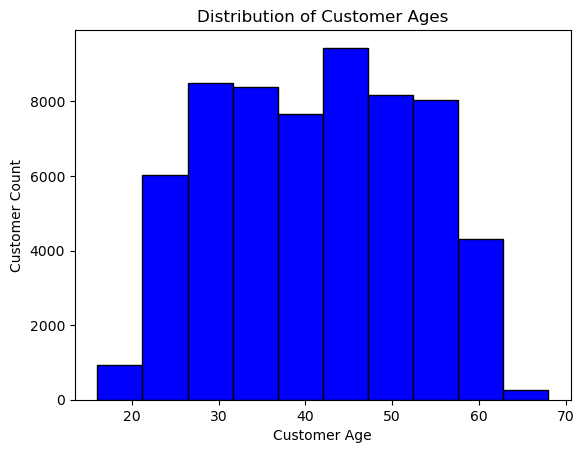

In [7]:
plt.hist(store_data['Customer_Age'], bins = 10, color='blue',edgecolor='black')
plt.xlabel("Customer Age")
plt.ylabel("Customer Count")
plt.title("Distribution of Customer Ages")

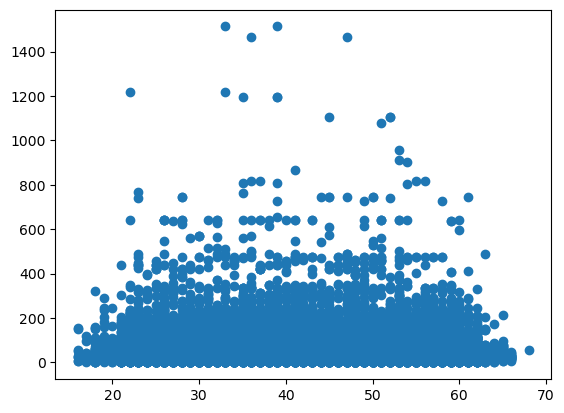

In [8]:
store_data["Gross_Profit"] = store_data["Sales_Amount"] - store_data["Operational_Cost"]
plt.scatter(store_data["Customer_Age"], store_data["Gross_Profit"])

Text(0.5, 1.0, 'Total Gross Profit in 2022 per Category')

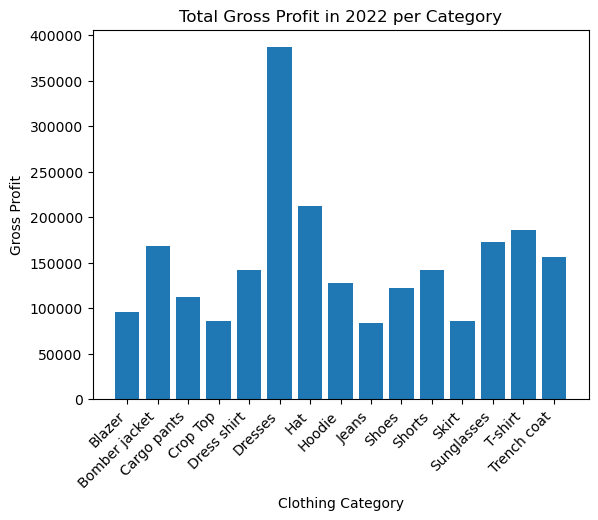

In [9]:
store_category_groups = store_data.groupby('SKU_Category')
summary = store_category_groups['Gross_Profit'].sum()
summary = summary.reset_index()
plt.bar(summary["SKU_Category"], summary["Gross_Profit"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Clothing Category")
plt.ylabel("Gross Profit")
plt.title("Total Gross Profit in 2022 per Category")

In 2022, most of the total gross profit came from selling dresses, which is nearly double the total gross profit from the second highest profit, coming from hats. Clothing items with the least gross profit are blazers, crop tops, jeans, and skirts.

In [10]:
dresses_data = store_data[store_data["SKU_Category"] == "Dresses"]
dresses_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age,Quarter,Month,Age_Group,Gross_Profit
64,02/01/2022,4122,76,Dresses,9F8O1,2.0,123.6,43.0,36,"Q1, 2022",Jan,31-40,80.6
66,02/01/2022,4122,76,Dresses,GYQNP,2.0,144.0,55.4,36,"Q1, 2022",Jan,31-40,88.6
79,02/01/2022,3,90,Dresses,Y1M2E,2.0,81.6,31.3,52,"Q1, 2022",Jan,51-60,50.3
187,04/01/2022,8858,212,Dresses,BDD5Z,1.0,81.0,56.6,35,"Q1, 2022",Jan,31-40,24.4
193,04/01/2022,5475,214,Dresses,KE0PX,2.0,257.7,92.9,26,"Q1, 2022",Jan,21-30,164.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61821,04/07/2022,11367,32861,Dresses,5W5FN,2.0,136.1,51.7,37,"Q3, 2022",Jul,31-40,84.4
61823,04/07/2022,17632,32862,Dresses,31IUT,1.0,251.2,189.4,31,"Q3, 2022",Jul,31-40,61.8
61825,04/07/2022,14811,32864,Dresses,UPB37,1.0,265.4,195.1,53,"Q3, 2022",Jul,51-60,70.3
61839,04/07/2022,16955,32877,Dresses,YVZC5,2.0,72.7,27.7,48,"Q3, 2022",Jul,41-50,45.0


# Exploring returning customer's age

/var/folders/v0/lmm7tvts47v_v412r418pbph0000gn/T/ipykernel_61607/3211014908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_vs_transactions = store_data.groupby('Age_Group')['Transaction_ID'].nunique().reset_index()


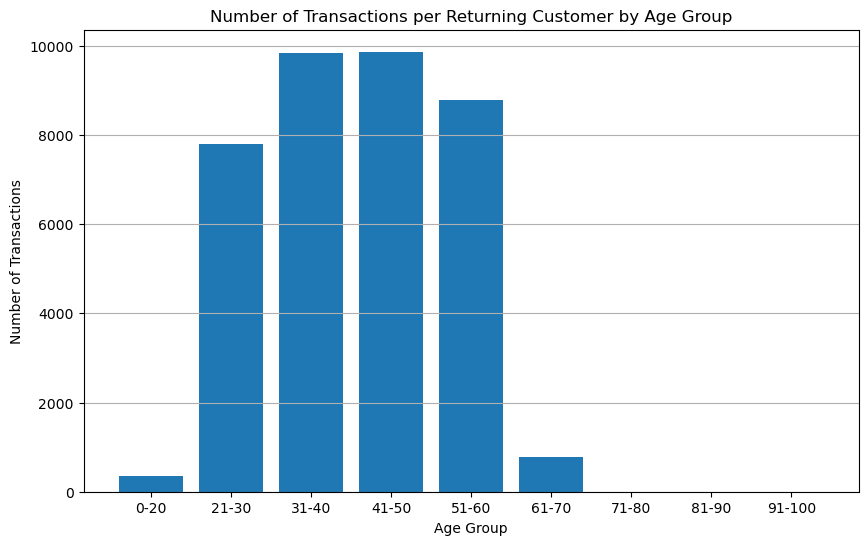

In [11]:
# Group by Age_Group and count the number of unique Transaction_IDs for each age group
age_group_vs_transactions = store_data.groupby('Age_Group')['Transaction_ID'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(age_group_vs_transactions['Age_Group'], age_group_vs_transactions['Transaction_ID'])
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Returning Customer by Age Group')
plt.grid(axis='y')
plt.show()


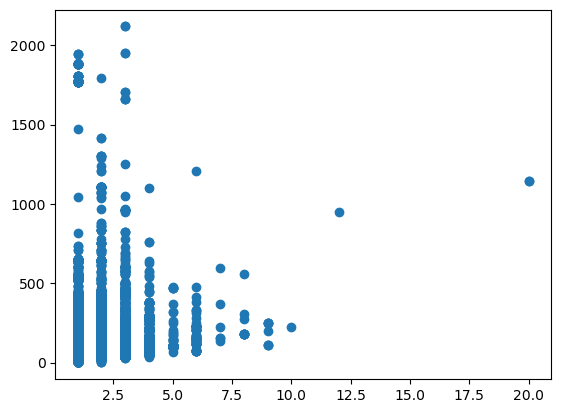

In [12]:
plt.scatter(store_data["Quantity"], store_data["Sales_Amount"])